<a href="https://colab.research.google.com/github/ashish1610dhiman/india_income_inequality/blob/main/indian_decile_gdp_from_inc_share.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## World inequality data
https://wid.world/data/

In [ ]:
!cat WID_data_IN.csv | head -n 5

country;variable;percentile;year;value;age;pop
IN;ehfcari999;p0p100;1990;312.117210157097;999;i
IN;ehfcari999;p0p100;1991;328.894016002168;999;i
IN;ehfcari999;p0p100;1992;355.461498859108;999;i
IN;ehfcari999;p0p100;1993;358.065984849116;999;i


In [ ]:
india_wid = pd.read_csv('WID_data_IN.csv',sep=";")
pk_wid = pd.read_csv('WID_data_PK.csv',sep=";")
india_wid.head()

,country,variable,percentile,year,value,age,pop
0,IN,ehfcari999,p0p100,1990,312.117210,999,i
1,IN,ehfcari999,p0p100,1991,328.894016,999,i
2,IN,ehfcari999,p0p100,1992,355.461499,999,i
3,IN,ehfcari999,p0p100,1993,358.065985,999,i
4,IN,ehfcari999,p0p100,1994,370.890249,999,i


## GDP per capita
- variable = `agdproi999`: GDP per capita in local currency for all
- variable = `agdproi992`: GDP per capita in local currency for adults

In [ ]:
!cat WID_metadata_IN.csv | grep agdpro

IN;agdproi992;992;i;India;Gross domestic product;Gross domestic product is the total value of goods and services produced by the national economy.The national economy - in the national accounts sense - includes all domestic sectors, i.e. all entities that are resident of a given country (in the sense of their economic activity), whether they belong to the private sector, the corporate sector, the governement sector.;;Average;Average income or wealth between two percentiles. When the associated percentile is of the form 'pX', intermediary average returns the average between percentile pX and the next consecutive percentile. When the associated percentile is of the form 'pXpY', the variable returns the average between percentiles pX and pY.;individuals;The base unit is the individual (rather than the household). This is equivalent to assuming no sharing of resources within couples.;Adults;The population is comprised of individuals over age 20.;INR;See DINA guidelines for methodological e

In [ ]:
!cat WID_metadata_PK.csv | grep agdpro

PK;agdproi992;992;i;Pakistan;Gross domestic product;Gross domestic product is the total value of goods and services produced by the national economy.The national economy - in the national accounts sense - includes all domestic sectors, i.e. all entities that are resident of a given country (in the sense of their economic activity), whether they belong to the private sector, the corporate sector, the governement sector.;;Average;Average income or wealth between two percentiles. When the associated percentile is of the form 'pX', intermediary average returns the average between percentile pX and the next consecutive percentile. When the associated percentile is of the form 'pXpY', the variable returns the average between percentiles pX and pY.;individuals;The base unit is the individual (rather than the household). This is equivalent to assuming no sharing of resources within couples.;Adults;The population is comprised of individuals over age 20.;PKR;See DINA guidelines for methodologica

In [ ]:
india_wid[(india_wid.variable.str.contains('agdpro')) & (india_wid.year==2023)]

,country,variable,percentile,year,value,age,pop
66135,IN,agdproi999,p0p100,2023,200699.4,999,i
88517,IN,agdproi992,p0p100,2023,303975.6,992,i


In [ ]:
pk_wid[(pk_wid.variable.str.contains('agdpro')) & (pk_wid.year==2023)]

,country,variable,percentile,year,value,age,pop
5773,PK,agdproi999,p0p100,2023,373254.8,999,i
11439,PK,agdproi992,p0p100,2023,710782.8,992,i


- 2023 avg market exchange rates
  - IN: https://www.irs.gov/individuals/international-taxpayers/yearly-average-currency-exchange-rates
  - PK: https://www.exchange-rates.org/exchange-rate-history/usd-pkr-2023

In [ ]:
usd_to_local = {
    "USDINR": 82.572, "USDPKR": 279.86
}

In [ ]:
percapita_gdp_usd = {
    "IN": 200699.4* (1/usd_to_local["USDINR"]),
    "PK": 373254.8* (1/usd_to_local["USDPKR"])
}

for country, value in percapita_gdp_usd.items():
    print(f"{country}: {value:.0f}")

IN: 2431
PK: 1334


In [ ]:
2431/1334

1.8223388305847077

## Income Inequality decile analysis
- variable: `

In [ ]:
!cat WID_metadata_IN.csv | grep aptinc

IN;aptincj992;992;j;India;Pre-tax national income ;Pre-tax national income  is the sum of all pre-tax personal income flows accruing to the owners of the production factors, labor and capital, before taking into account the operation of the tax/transfer system, but after taking into account the operation of pension system. The central difference between personal factor income and pre-tax income is the treatment of pensions, which are counted on a contribution basis by factor income and on a distribution basis by pre-tax income.;Pre-tax national income =Pre-tax labor income [total pre-tax income ranking]+Pre-tax capital income [total pre-tax income ranking];Average;Average income or wealth between two percentiles. When the associated percentile is of the form 'pX', intermediary average returns the average between percentile pX and the next consecutive percentile. When the associated percentile is of the form 'pXpY', the variable returns the average between percentiles pX and pY.;equal-s

In [245]:
income_variable = "sptinc"
india_income_percentiles = india_wid[(india_wid.variable.str.contains(income_variable)) & (india_wid.year==2023) & (india_wid.age==999)]
pk_income_percentiles = pk_wid[(pk_wid.variable.str.contains(income_variable)) & (pk_wid.year==2023) & (pk_wid.age==999)]
print(india_income_percentiles.shape, pk_income_percentiles.shape)

(387, 7) (387, 7)


In [246]:
# + ['p90p95','p90p99','p99p100']
decile_keys = [f"p{start}p{start+10}" for start in range(0, 100, 10)]
decile_keys

['p0p10',
 'p10p20',
 'p20p30',
 'p30p40',
 'p40p50',
 'p50p60',
 'p60p70',
 'p70p80',
 'p80p90',
 'p90p100']

In [248]:
india_income_percentiles.head()

,country,variable,percentile,year,value,age,pop
321436,IN,sptincj999,p0p1,2023,0.0008,999,j
321518,IN,sptincj999,p0p10,2023,0.0164,999,j
321600,IN,sptincj999,p0p100,2023,1.0000,999,j
321682,IN,sptincj999,p0p11,2023,0.0187,999,j
321764,IN,sptincj999,p0p12,2023,0.0210,999,j


In [249]:
india_income_subset = india_income_percentiles[india_income_percentiles.percentile.isin(decile_keys)]

pk_income_subset = pk_income_percentiles[pk_income_percentiles.percentile.isin(decile_keys)]

In [250]:
cols = ["percentile","variable","value"]
in_pk_income = india_income_subset[cols].merge(pk_income_subset[cols], on=["percentile","variable"], suffixes=("_IN", "_PK"))
in_pk_income

,percentile,variable,value_IN,value_PK
0,p0p10,sptincj999,0.0164,0.0209
1,p10p20,sptincj999,0.0253,0.0315
2,p20p30,sptincj999,0.0308,0.0391
3,p30p40,sptincj999,0.0360,0.0469
4,p40p50,sptincj999,0.0416,0.0558
5,p50p60,sptincj999,0.0487,0.0668
6,p60p70,sptincj999,0.0576,0.0815
7,p70p80,sptincj999,0.0708,0.1023
8,p80p90,sptincj999,0.0958,0.1381
9,p90p100,sptincj999,0.5768,0.4172


Text(0.5, 1.0, 'share of national income - India vs Pakistan grp by deciles (2023 USD)')

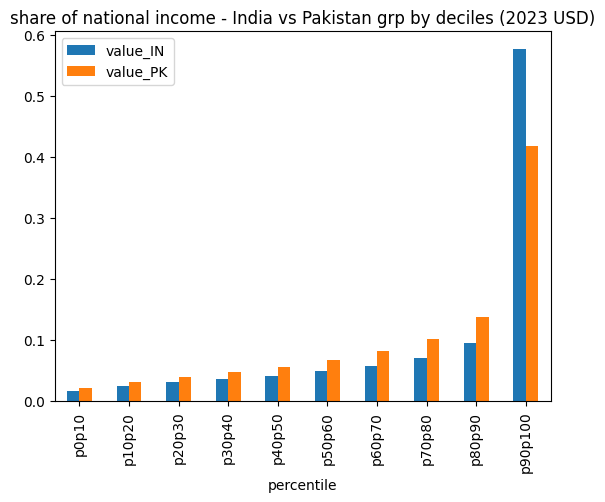

In [251]:
in_pk_income.plot(y=["value_IN","value_PK"], x="percentile", kind="bar")
plt.title("share of national income - India vs Pakistan grp by deciles (2023 USD)")

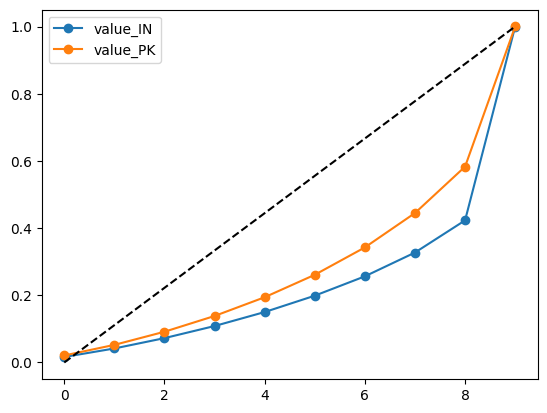

In [277]:
ax = (in_pk_income[["value_IN","value_PK"]].cumsum()).plot(marker="o")
ax.plot([0, 9], [0, 1], linestyle='--', color='black', label='Diagonal')

## Translate income distribution to GDP per capita


In [258]:
in_pk_income["gpd_percentile_IN"] = in_pk_income.value_IN * percapita_gdp_usd["IN"] * 10
in_pk_income["gpd_percentile_PK"] = in_pk_income.value_PK * percapita_gdp_usd["PK"] *10

In [259]:
in_pk_income[["gpd_percentile_IN","gpd_percentile_PK"]].mean()

,0
gpd_percentile_IN,2430.112630
gpd_percentile_PK,1333.853089


In [260]:
in_pk_income['in_rt_pk'] = in_pk_income.gpd_percentile_IN / in_pk_income.gpd_percentile_PK
in_pk_income

,percentile,variable,value_IN,value_PK,gpd_percentile_IN,gpd_percentile_PK,in_rt_pk
0,p0p10,sptincj999,0.0164,0.0209,398.618195,278.747421,1.430034
1,p10p20,sptincj999,0.0253,0.0315,614.941484,420.121711,1.463722
2,p20p30,sptincj999,0.0308,0.0391,748.624415,521.484409,1.435564
3,p30p40,sptincj999,0.0360,0.0469,875.015550,625.514547,1.398873
4,p40p50,sptincj999,0.0416,0.0558,1011.129080,744.215602,1.358651
5,p50p60,sptincj999,0.0487,0.0668,1183.701591,890.924771,1.328621
6,p60p70,sptincj999,0.0576,0.0815,1400.024880,1086.981569,1.287993
7,p70p80,sptincj999,0.0708,0.1023,1720.863915,1364.395270,1.261265
8,p80p90,sptincj999,0.0958,0.1381,2328.513603,1841.866929,1.264214
9,p90p100,sptincj999,0.5768,0.4172,14019.693591,5564.278659,2.519589


In [261]:
in_pk_income.describe()

,value_IN,value_PK,gpd_percentile_IN,gpd_percentile_PK,in_rt_pk
count,10.000000,10.00000,10.000000,10.000000,10.000000
mean,0.099980,0.10001,2430.112630,1333.853089,1.474853
std,0.169149,0.11688,4111.331550,1558.851221,0.374272
min,0.016400,0.02090,398.618195,278.747421,1.261265
25%,0.032100,0.04105,780.222199,547.491944,1.298150
50%,0.045150,0.06130,1097.415336,817.570187,1.378762
75%,0.067500,0.09710,1640.654156,1295.041845,1.434182
max,0.576800,0.41720,14019.693591,5564.278659,2.519589


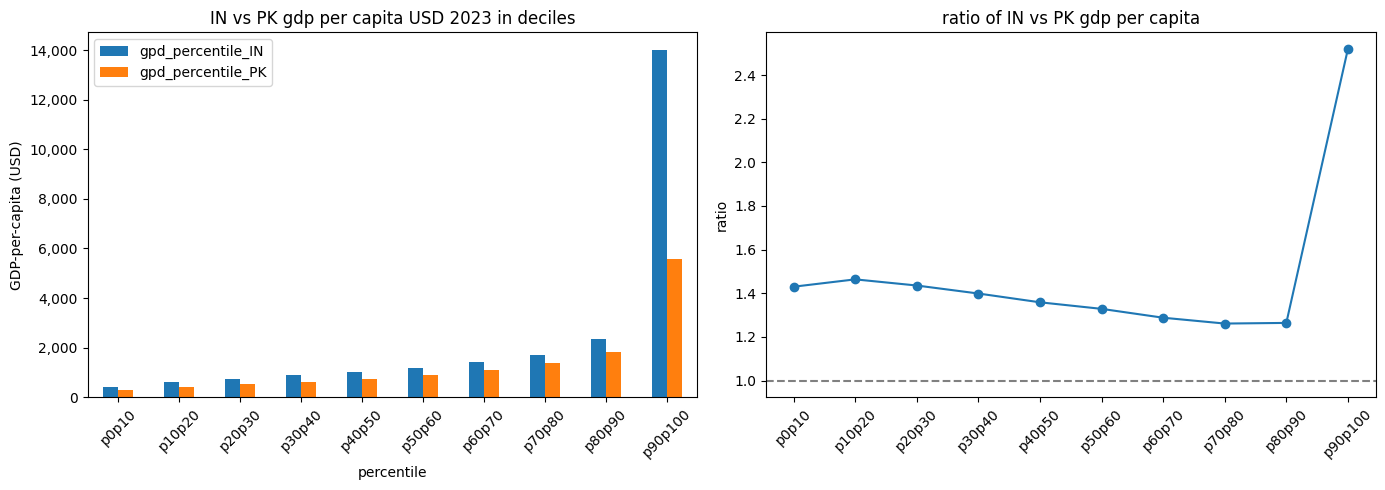

In [263]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# First plot: ratio_usd
in_pk_income.plot(y=["gpd_percentile_IN","gpd_percentile_PK"], x="percentile", kind="bar", ax=axes[0])
axes[0].set_title('IN vs PK gdp per capita USD 2023 in deciles')
axes[0].set_ylabel('GDP-per-capita (USD)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{x:,.0f}"))

# Second plot: in_rt_pk with horizontal line at 1.0
axes[1].plot(in_pk_income['percentile'], in_pk_income['in_rt_pk'], marker='o')
axes[1].axhline(1.0, linestyle='--', color='grey')
axes[1].set_title('ratio of IN vs PK gdp per capita')
axes[1].set_ylabel('ratio')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()